<a href="https://colab.research.google.com/github/VesalAhsani/Deep-learning-with-PyTorch/blob/main/07_PyTorch_Model_Deployment_Huggingface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instructor: Dr. Vesal Ahsani

## PyTorch Model Deployment


*we're going to deploy our FoodVision model to the internet as a usable app!*


## What is machine learning model deployment?

**Machine learning model deployment** is the process of making your machine learning model accessible to someone or something else.

Someone else being a person who can interact with your model in some way. 

For example, someone taking a photo on their smartphone of food and then having our FoodVision Mini model classify it into pizza, steak or sushi.

Something else might be another program, app or even another model that interacts with your machine learning model(s). 

For example, a banking database might rely on a machine learning model making predictions as to whether a transaction is fraudulent or not before transferring funds.

Or an operating system may lower its resource consumption based on a machine learning model making predictions on how much power someone generally uses at specific times of day.

These use cases can be mixed and matched as well.

For example, a Tesla car's computer vision system will interact with the car's route planning program (something else) and then the route planning program will get inputs and feedback from the driver (someone else).

          
          


what happens if someone was to upload a photo that *wasn't* of food to our FoodVision model?

One solution would be to create another model that first classifies images as "food" or "not food" and passing the target image through that model first.

Then if the image is of "food" it goes to our FoodVision model.

And if it's "not food", a message is displayed.

But what if these predictions were wrong?

What happens then?

You can see how these questions could keep going.

Thus this highlights the importance of model deployment: it helps you figure out errors in your model that aren't obvious during training/testing.

## Different types of machine learning model deployment


1. **Where's it going to go?** - As in, where is it going to be stored?
2. **How's it going to function?** - As in, does it return predictions immediately? Or do they come later?

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/09-deployment-questions-to-ask.png" alt="some questions to ask when starting to deploy machine learning models, what's the model ideal use case, then work backwards and ask where's my model going to go and how's my model going to function" width=900/>

*When starting to deploy machine learning models, it's helpful to start by asking what's the most ideal use case and then work backwards from there, asking where the model's going to go and then how it's going to function.*

### Where's it going to go?

When you deploy your machine learning model, where does it live?

The main debate here is usually on-device (also called edge/in the browser) or on the cloud (a computer/server that isn't the *actual* device someone/something calls the model from). 

Both have their pros and cons.

| **Deployment location** | **Pros** | **Cons** | 
| ----- | ----- | ----- |
| **On-device (edge/In the browser)** | Can be very fast (since no data leaves the device) | Limited compute power (larger models take longer to run) | 
| | Privacy preserving (again no data has to leave the device) | Limited storage space (smaller model size required) | 
| | No internet connection required (sometimes) | Device-specific skills often required | 
| | | | 
| **On cloud** | Near unlimited compute power (can scale up when needed) | Costs can get out of hand (if proper scaling limits aren't enforced) |
| | Can deploy one model and use everywhere (via API) | Predictions can be slower due to data having to leave device and predictions having to come back (network latency) |
| | Links into existing cloud ecosystem | Data has to leave device (this may cause privacy concerns) |




.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/09-model-deployment-on-device-vs-cloud.png" width=900 alt="tesla computer vision system on device vs on the cloud"/>

*In the case of a Tesla car's computer vision system, which would be better? A smaller model that performs well on device (model is on the car) or a larger model that performs better that's on the cloud? In this case, you'd much prefer the model being on the car. The extra network time it would take for data to go from the car to the cloud and then back to the car just wouldn't be worth it (or potentially even possible with poor signal areas).*



### How's it going to function?


These two scenarios are generally referred to as:

* **Online (real-time)** - Predicitions/inference happen **immediately**. For example, someone uploads an image, the image gets transformed and predictions are returned or someone makes a purchase and the transaction is verified to be non-fradulent by a model so the purchase can go through.

> **Note:** Real-time in this case being ~30FPS (frames per second) because that's [about how fast the human eye can see](https://www.healthline.com/health/human-eye-fps) (there is debate on this but let's just use ~30FPS as our benchmark) (0.03 seconds inference time per image, also known as latency).

* **Offline (batch)** - Predictions/inference happen **periodically**. For example, a photos application sorts your images into different categories (such as beach, mealtime, family, friends) whilst your mobile device is plugged into charge.

> **Note:** "Batch" refers to inference being performed on multiple samples at a time. However, batch processing can happen immediately/online (multiple images being classified at once) and/or offline (mutliple images being predicted/trained on at once).  

The main difference between each being: predictions being made immediately or periodically.


In our case, we'd want our inference pipeline to happen online (real-time), so when someone uploads an image of food, the prediction results are returned immediately.


### Ways to deploy a machine learning model

We've discussed a couple of options for deploying machine learning models (on-device and cloud).

And each of these will have their specific requirements:

| **Tool/resource** | **Deployment type** | 
| ----- | ----- |
| [Google's ML Kit](https://developers.google.com/ml-kit) | On-device (Android and iOS) | 
| [Apple's Core ML](https://developer.apple.com/documentation/coreml) and [`coremltools` Python package](https://coremltools.readme.io/docs) | On-device (all Apple devices) | 
| [Amazon Web Service's (AWS) Sagemaker](https://aws.amazon.com/sagemaker/) | Cloud | 
| [Google Cloud's Vertex AI](https://cloud.google.com/vertex-ai) | Cloud |
| [Microsoft's Azure Machine Learning](https://azure.microsoft.com/en-au/services/machine-learning/) | Cloud |
| [Hugging Face Spaces](https://huggingface.co/spaces) | Cloud |
| API with [FastAPI](https://fastapi.tiangolo.com) | Cloud/self-hosted server |
| API with [TorchServe](https://pytorch.org/serve/) | Cloud/self-hosted server | 
| [ONNX (Open Neural Network Exchange)](https://onnx.ai/index.html) | Many/general |
| Many more... |

> **Note:** An [application programming interface (API)](https://en.wikipedia.org/wiki/API) is a way for two (or more) computer programs to interact with each other. For example, if your model was deployed as API, you would be able to write a program that could send data to it and then receive predictions back.

Which option you choose will be highly dependent on what you're building/who you're working with.


And one of the best ways to do so is by turning your machine learning model into a demo app with [Gradio](https://gradio.app) and then deploying it on Hugging Face Spaces.


<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/09-tools-and-places-to-deploy-ml-models.png" alt="tools and places to deploy machine learning models" width=900/>

*A handful of places and tools to host and deploy machine learning models.*

# Let's Start !!!

## 1. Getting data



In [1]:
import torch
import torchvision
from torch import nn
from torchvision import datasets
from torch.utils.data import DataLoader

try:
  import torchmetrics
except:
  print("torchmetrics is not installed ...")
  !pip -q install torchmetrics

torchmetrics is not installed ...
     |████████████████████████████████| 529 kB 6.8 MB/s 


In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [4]:
def set_seeds():
  torch.manual_seed(42)
  torch.cuda.manual_seed(42)

### Let's create random 20 percent of Food101 data train and test dataset in our desired format 

#### you only use this part if you want to train your model on some parts of your whole data

In [12]:
from pathlib import Path

data_dir = Path("data")
class_names = train_dataset.classes

# Get random 20% of training images
import random

# Setup data paths
data_path = data_dir / "food-101" / "images"

# Change amount of data to get (e.g. 0.1 = random 10%, 0.2 = random 20%)
amount_to_get = 0.2

# Create function to separate a random amount of data
def get_subset(image_path=data_path,
               data_splits=["train", "test"],
               amount=0.2,
               seed=42):
    random.seed(42)
    label_splits = {}
    
    # Get labels
    for data_split in data_splits:
        print(f"[INFO] Creating image split for: {data_split}...")
        label_path = data_dir / "food-101" / "meta" / f"{data_split}.txt"
        with open(label_path, "r") as f:
            labels = [line.strip("\n") for line in f.readlines()] 
        
        # Get random subset of target classes image ID's
        number_to_sample = round(amount * len(labels))
        print(f"[INFO] Getting random subset of {number_to_sample} images for {data_split}...")
        sampled_images = random.sample(labels, k=number_to_sample)
        
        # Apply full paths
        image_paths = [Path(str(image_path / sample_image) + ".jpg") for sample_image in sampled_images]
        label_splits[data_split] = image_paths
    return label_splits
        
label_splits = get_subset(amount=amount_to_get)
label_splits["train"][:10]

[INFO] Creating image split for: train...
[INFO] Getting random subset of 15150 images for train...
[INFO] Creating image split for: test...
[INFO] Getting random subset of 5050 images for test...


[PosixPath('data/food-101/images/chicken_quesadilla/2670687.jpg'),
 PosixPath('data/food-101/images/beef_tartare/2507172.jpg'),
 PosixPath('data/food-101/images/greek_salad/1260996.jpg'),
 PosixPath('data/food-101/images/french_toast/3917826.jpg'),
 PosixPath('data/food-101/images/foie_gras/1035427.jpg'),
 PosixPath('data/food-101/images/clam_chowder/2402986.jpg'),
 PosixPath('data/food-101/images/cheese_plate/75029.jpg'),
 PosixPath('data/food-101/images/sushi/2019344.jpg'),
 PosixPath('data/food-101/images/ceviche/1648055.jpg'),
 PosixPath('data/food-101/images/panna_cotta/357026.jpg')]

In [13]:
# Create target directory path
target_dir_name = f"data/food101_{str(int(amount_to_get*100))}_percent"
print(f"Creating directory: '{target_dir_name}'")

# Setup the directories
target_dir = Path(target_dir_name)

# Make the directories
target_dir.mkdir(parents=True, exist_ok=True)

Creating directory: 'data/food101_20_percent'


In [ ]:
import shutil

for image_split in label_splits.keys():
    for image_path in label_splits[str(image_split)]:
        dest_dir = target_dir / image_split / image_path.parent.stem / image_path.name
        if not dest_dir.parent.is_dir():
            dest_dir.parent.mkdir(parents=True, exist_ok=True)
        print(f"[INFO] Copying {image_path} to {dest_dir}...")
        shutil.copy2(image_path, dest_dir)

In [ ]:
# Check lengths of directories
def walk_through_dir(dir_path):
  import os
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
    
walk_through_dir(target_dir)

## 2. FoodVision model deployment experiment outline

The ideal deployed model performs well and fast. 

We'd like our model to perform as close to real-time as possible.


To try and achieve these results, let's bring in our best performing models from the previous sections: 

1. **EffNetB2 feature extractor** (EffNetB2 for short) - originally created using [`torchvision.models.efficientnet_b2()`](https://pytorch.org/vision/stable/models/generated/torchvision.models.efficientnet_b2.html#efficientnet-b2) with adjusted `classifier` layers.
2. **ViT-B/16 feature extractor** (ViT for short) - originally created using [`torchvision.models.vit_b_16()`](https://pytorch.org/vision/stable/models/generated/torchvision.models.vit_b_16.html#vit-b-16) with adjusted `head` layers.
    * **Note** ViT-B/16 stands for "Vision Transformer Base, patch size 16".


## 3. Creating an EffNetB2 feature extractor


1. Setup the pretrained weights as [`weights=torchvision.models.EfficientNet_B2_Weights.DEFAULT`](https://pytorch.org/vision/stable/models/generated/torchvision.models.efficientnet_b2.html#torchvision.models.EfficientNet_B2_Weights), where "`DEFAULT`" means "best currently available" (or could use `weights="DEFAULT"`). 
2. Get the pretrained model image transforms from the weights with the `transforms()` method (we need these so we can convert our images into the same format as the pretrained EffNetB2 was trained on).
3. Create a pretrained model instance by passing the weights to an instance of [`torchvision.models.efficientnet_b2`](https://pytorch.org/vision/stable/models/generated/torchvision.models.efficientnet_b2.html#efficientnet-b2).
4. Freeze the base layers in the model.
5. Update the classifier head to suit our own data.

In [5]:
def create_effnetb2_model(num_classes, 
                          seed):  
    """Creates an EfficientNetB2 feature extractor model and transforms.

    Args:
        num_classes (int, optional): number of classes in the classifier head. 
        seed (int, optional): random seed value. Defaults to 42.

    Returns:
        model (torch.nn.Module): EffNetB2 feature extractor model. 
        transforms (torchvision.transforms): EffNetB2 image transforms.
    """
    # 1, 2, 3. Create EffNetB2 pretrained weights, transforms and model
    weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT
    effnetb2_transforms = weights.transforms()
    effnetb2 = torchvision.models.efficientnet_b2(weights=weights)

    # 4. Freeze all layers in base model
    for param in effnetb2.parameters():
        param.requires_grad = False

    # 5. Change classifier head with random seed for reproducibility
    torch.manual_seed(seed)
    effnetb2.classifier = nn.Sequential(
        nn.Dropout(p=0.3, inplace=True),
        nn.Linear(in_features=1408, out_features=num_classes),
    )
    
    return effnetb2, effnetb2_transforms

In [6]:
effnetb2, effnetb2_transforms = create_effnetb2_model(num_classes=101,
                                                      seed=42)

Downloading: "https://download.pytorch.org/models/efficientnet_b2_rwightman-bcdf34b7.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b2_rwightman-bcdf34b7.pth


  0%|          | 0.00/35.2M [00:00<?, ?B/s]

In [10]:
food101_effnetb2_transforms = torchvision.transforms.Compose([
    torchvision.transforms.TrivialAugmentWide(),
    effnetb2_transforms,
])

###  Creating DataLoaders for EffNetB2 



In [11]:
# Setup the optimizer
optimizer = torch.optim.Adam(params=effnetb2.parameters(), 
                              lr=1e-3)

# Setup the loss function for multi-class classification
loss_fn = torch.nn.CrossEntropyLoss(label_smoothing=0.1)

from torchmetrics import Accuracy
accuracy_fn = Accuracy().to(device)

from pathlib import Path
data_dir = Path("data")

#### When you want to make use of random part of Food101 data (whole dataset)

# train_dir = "data/food101_20_percent/train"
# test_dir = "data/food101_20_percent/test"


# train_dataset = datasets.ImageFolder(root=train_dir, transform=food101_effnetb2_transforms)
# test_dataset = datasets.ImageFolder(root=test_dir, transform=food101_effnetb2_transforms)

#### When you want to tain your model on all of the data
train_dataset = datasets.Food101(root=data_dir, 
                                 split="train", 
                                 transform=food101_effnetb2_transforms,
                                 download=True)

test_dataset = datasets.Food101(root=data_dir, 
                                 split="test", 
                                 transform=food101_effnetb2_transforms,
                                 download=True)

BATCH_SIZE=32
NUM_WORKERS = 1
train_dataloader = DataLoader(dataset=train_dataset,
                                batch_size=BATCH_SIZE,
                                shuffle=True,
                                num_workers=NUM_WORKERS)
test_dataloader = DataLoader(dataset=test_dataset,
                                batch_size=BATCH_SIZE,
                                shuffle=False,
                                num_workers=NUM_WORKERS)

def train_step(model, dataloader, loss_fn, accuracy_fn, optimizer, device):
  model.train()
  train_loss, train_acc = 0, 0

  for batch, (X,y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  
  train_loss /= len(dataloader)
  train_acc /= len(dataloader)
  return train_loss, train_acc

def test_step(model, dataloader, loss_fn, accuracy_fn, device):
  model.eval()
  test_loss, test_acc = 0, 0

  with torch.inference_mode():
    for batch, (X,y) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)
      test_pred = model(X)
      loss = loss_fn(test_pred, y)
      test_loss += loss
      test_acc += accuracy_fn(test_pred, y)

    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
    return test_loss, test_acc

def train(model, train_dataloader, test_dataloader, loss_fn, accuracy_fn, optimizer, epochs, device):
  from tqdm.auto import tqdm

  results = {"train_loss":[],
             "train_acc":[],
             "test_loss":[],
             "test_acc":[]
             }
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model, train_dataloader, loss_fn, accuracy_fn, optimizer, device)
    test_loss, test_acc = test_step(model, test_dataloader, loss_fn, accuracy_fn, device)
  
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

    print(f"Epoch: {epoch+1} | train_loss: {train_loss:.4f} train_acc: {train_acc:.2f}% | test_loss: {test_loss:.4f} test_acc: {test_acc:.2f}%")

  return results

  0%|          | 0/4996278331 [00:00<?, ?it/s]

Extracting data/food-101.tar.gz to data


### Training EffNetB2 feature extractor



In [48]:
set_seeds()
food101_results_effnetb2 = train(effnetb2.to(device),train_dataloader,test_dataloader,loss_fn,accuracy_fn,optimizer,5,device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2.9841 train_acc: 0.41% | test_loss: 2.3764 test_acc: 0.55%
Epoch: 2 | train_loss: 2.6495 train_acc: 0.48% | test_loss: 2.2870 test_acc: 0.57%
Epoch: 3 | train_loss: 2.6161 train_acc: 0.49% | test_loss: 2.2633 test_acc: 0.58%
Epoch: 4 | train_loss: 2.5940 train_acc: 0.50% | test_loss: 2.2419 test_acc: 0.59%
Epoch: 5 | train_loss: 2.5908 train_acc: 0.50% | test_loss: 2.2313 test_acc: 0.60%


### Inspecting EffNetB2 loss curves 


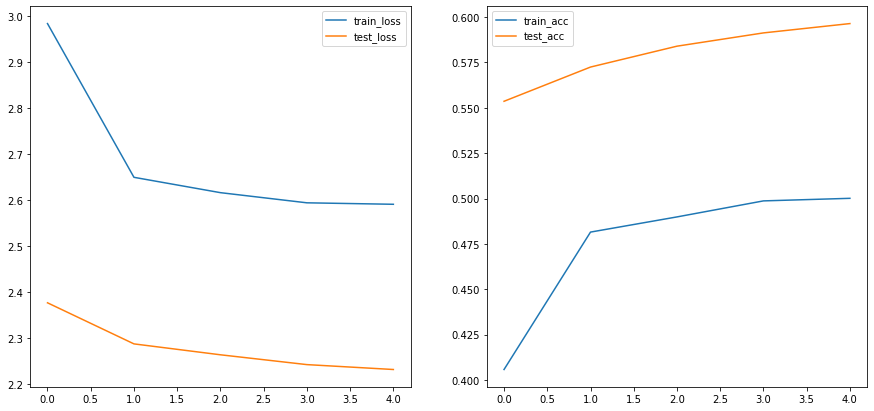

In [49]:
# Let's plot loss curves
import matplotlib.pyplot as plt
import numpy as np

train_loss=[]
train_acc=[]
test_loss=[]
test_acc=[]
for i in range(len(food101_results_effnetb2["train_loss"])):
  tr_loss = food101_results_effnetb2["train_loss"][i].cpu().detach().numpy().item()
  tr_acc = food101_results_effnetb2["train_acc"][i].cpu().detach().numpy().item()
  te_loss = food101_results_effnetb2["test_loss"][i].cpu().detach().numpy().item()
  te_acc = food101_results_effnetb2["test_acc"][i].cpu().detach().numpy().item()

  train_loss.append(tr_loss)
  train_acc.append(tr_acc)
  test_loss.append(te_loss)
  test_acc.append(te_acc)

epochs = range(len(food101_results_effnetb2["train_loss"]))

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(epochs, train_loss, label = "train_loss")
plt.plot(epochs, test_loss, label = "test_loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs, train_acc, label = "train_acc")
plt.plot(epochs, test_acc, label = "test_acc")
plt.legend();

### Saving EffNetB2 feature extractor


In [50]:
model_dir = Path("models")
model_dir.mkdir(parents=True, exist_ok=True)

torch.save(obj=effnetb2.state_dict(),
           f="models/food101_effnetb2_feature_extractor_101classes.pth")

In [17]:
# Create Food101 compatible EffNetB2 instance
loaded_effnetb2_food101, effnetb2_transforms = create_effnetb2_model(num_classes=101, seed=42)

# Load the saved model's state_dict()
loaded_effnetb2_food101.load_state_dict(torch.load("models/food101_effnetb2_feature_extractor_101classes.pth", map_location=torch.device('cpu')))

# loaded_effnetb2_food101.load_state_dict(torch.load("models/food101_effnetb2_feature_extractor_101classes.pth"))

<All keys matched successfully>

### Checking the size of EffNetB2 feature extractor

To check our model's size in bytes, we can use Python's [`pathlib.Path.stat("path_to_model").st_size`](https://docs.python.org/3/library/pathlib.html#pathlib.Path.stat) and then we can convert it (roughly) to megabytes by dividing it by `(1024*1024)`. 

In [18]:
food101_effnetb2_size = Path("models/food101_effnetb2_feature_extractor_101classes.pth").stat().st_size // 1024**2
print(f"The Food101 efficientNetB2 feature extractor model size is {food101_effnetb2_size} MB")

The Food101 efficientNetB2 feature extractor model size is 30 MB


### Collecting EffNetB2 feature extractor stats



In [53]:
effnetb2_stats = {
    "test_loss": food101_results_effnetb2["test_loss"][-1].item(),
    "test_acc": food101_results_effnetb2["test_acc"][-1].item(),
    "model_size (MB)": food101_effnetb2_size
}

effnetb2_stats

{'test_loss': 2.231266975402832,
 'test_acc': 0.5964398980140686,
 'model_size (MB)': 30}

## 4. Creating a ViT feature extractor


We'll start by creating a function called `create_vit_model()` which will be very similar to `create_effnetb2_model()` except of course returning a ViT feature extractor model and transforms rather than EffNetB2.

Another slight difference is that `torchvision.models.vit_b_16()`'s output layer is called `heads` rather than `classifier`.

In [19]:
def create_vit_model(num_classes, 
                     seed):
    """Creates a ViT-B/16 feature extractor model and transforms.

    Args:
        num_classes (int, optional): number of target classes.
        seed (int, optional): random seed value for output layer. Defaults to 42.

    Returns:
        model (torch.nn.Module): ViT-B/16 feature extractor model. 
        transforms (torchvision.transforms): ViT-B/16 image transforms.
    """
    # Create ViT_B_16 pretrained weights, transforms and model
    weights = torchvision.models.ViT_B_16_Weights.DEFAULT
    vit_transforms = weights.transforms()
    vit = torchvision.models.vit_b_16(weights=weights)

    # Freeze all layers in model
    for param in vit.parameters():
        param.requires_grad = False

    # Change classifier head to suit our needs (this will be trainable)
    torch.manual_seed(seed)
    vit.heads = nn.Sequential(nn.Linear(in_features=768, # keep this the same as original model
                                          out_features=num_classes)) # update to reflect target number of classes
    
    return vit, vit_transforms

In [20]:
# Create ViT model and transforms
vit, vit_transforms = create_vit_model(num_classes=101,
                                       seed=42)

Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth


  0%|          | 0.00/330M [00:00<?, ?B/s]

In [21]:
food101_vit_transforms = torchvision.transforms.Compose([
    torchvision.transforms.TrivialAugmentWide(),
    vit_transforms
])

### Create DataLoaders for ViT



In [10]:
# Setup the optimizer
optimizer = torch.optim.Adam(params=vit.parameters(), 
                              lr=1e-3)

# Setup the loss function for multi-class classification
loss_fn = torch.nn.CrossEntropyLoss(label_smoothing=0.1)

from torchmetrics import Accuracy
accuracy_fn = Accuracy().to(device)

from pathlib import Path
data_dir = Path("data2")

train_dataset = datasets.Food101(root=data_dir, 
                                 split="train", 
                                 transform=food101_vit_transforms,
                                 download=True)

test_dataset = datasets.Food101(root=data_dir, 
                                 split="test", 
                                 transform=food101_vit_transforms,
                                 download=True)

# train_dir = "data/food101_20_percent/train"
# test_dir = "data/food101_20_percent/test"


# train_dataset = datasets.ImageFolder(root=train_dir, transform=food101_vitb16_transforms)
# test_dataset = datasets.ImageFolder(root=test_dir, transform=food101_vitb16_transforms)

BATCH_SIZE=32
NUM_WORKERS = 2
train_dataloader = DataLoader(dataset=train_dataset,
                                batch_size=BATCH_SIZE,
                                shuffle=True,
                                num_workers=NUM_WORKERS)
test_dataloader = DataLoader(dataset=test_dataset,
                                batch_size=BATCH_SIZE,
                                shuffle=False,
                                num_workers=NUM_WORKERS)

def train_step(model, dataloader, loss_fn, accuracy_fn, optimizer, device):
  model.train()
  train_loss, train_acc = 0, 0

  for batch, (X,y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  
  train_loss /= len(dataloader)
  train_acc /= len(dataloader)
  return train_loss, train_acc

def test_step(model, dataloader, loss_fn, accuracy_fn, device):
  model.eval()
  test_loss, test_acc = 0, 0

  with torch.inference_mode():
    for batch, (X,y) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)
      test_pred = model(X)
      loss = loss_fn(test_pred, y)
      test_loss += loss
      test_acc += accuracy_fn(test_pred, y)

    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
    return test_loss, test_acc

def train(model, train_dataloader, test_dataloader, loss_fn, accuracy_fn, optimizer, epochs, device):
  from tqdm.auto import tqdm

  results = {"train_loss":[],
             "train_acc":[],
             "test_loss":[],
             "test_acc":[]
             }
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model, train_dataloader, loss_fn, accuracy_fn, optimizer, device)
    test_loss, test_acc = test_step(model, test_dataloader, loss_fn, accuracy_fn, device)
  
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

    print(f"Epoch: {epoch+1} | train_loss: {train_loss:.4f} train_acc: {train_acc:.2f}% | test_loss: {test_loss:.4f} test_acc: {test_acc:.2f}%")

  return results

  0%|          | 0/4996278331 [00:00<?, ?it/s]

Extracting data2/food-101.tar.gz to data2


### Training ViT feature extractor


In [11]:
set_seeds()
food101_results_vit = train(vit.to(device),train_dataloader,test_dataloader,loss_fn,accuracy_fn,optimizer,5,device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2.3348 train_acc: 0.56% | test_loss: 1.9544 test_acc: 0.67%
Epoch: 2 | train_loss: 2.0372 train_acc: 0.65% | test_loss: 1.8921 test_acc: 0.69%
Epoch: 3 | train_loss: 1.9760 train_acc: 0.67% | test_loss: 1.8786 test_acc: 0.69%
Epoch: 4 | train_loss: 1.9363 train_acc: 0.69% | test_loss: 1.8781 test_acc: 0.70%
Epoch: 5 | train_loss: 1.9171 train_acc: 0.69% | test_loss: 1.8783 test_acc: 0.70%


### Inspecting ViT loss curves



Those are some nice looking loss curves. Just like our EffNetB2 feature extractor model, it looks our ViT model might benefit from a little longer training time and perhaps some [data augmentation](https://www.learnpytorch.io/04_pytorch_custom_datasets/#6-other-forms-of-transforms-data-augmentation) (to help prevent overfitting). 

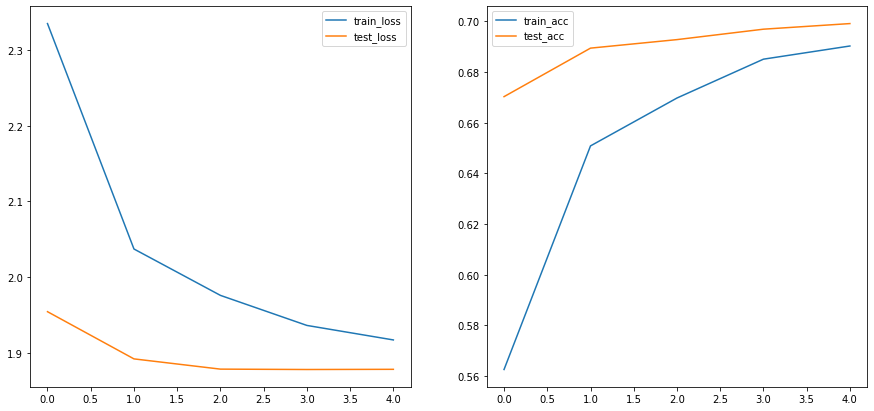

In [12]:
# Let's plot loss curves
import matplotlib.pyplot as plt
import numpy as np

train_loss=[]
train_acc=[]
test_loss=[]
test_acc=[]
for i in range(len(food101_results_vit["train_loss"])):
  tr_loss = food101_results_vit["train_loss"][i].cpu().detach().numpy().item()
  tr_acc = food101_results_vit["train_acc"][i].cpu().detach().numpy().item()
  te_loss = food101_results_vit["test_loss"][i].cpu().detach().numpy().item()
  te_acc = food101_results_vit["test_acc"][i].cpu().detach().numpy().item()

  train_loss.append(tr_loss)
  train_acc.append(tr_acc)
  test_loss.append(te_loss)
  test_acc.append(te_acc)

epochs = range(len(food101_results_vit["train_loss"]))

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(epochs, train_loss, label = "train_loss")
plt.plot(epochs, test_loss, label = "test_loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs, train_acc, label = "train_acc")
plt.plot(epochs, test_acc, label = "test_acc")
plt.legend();

### Saving ViT feature extractor


In [13]:
Path("models").mkdir(parents=True, exist_ok=True)
torch.save(vit.state_dict(),
           f="models/food101_vit_feature_extractor_101classes.pth")

In [22]:
loaded_food101_vit, vit_transforms = create_vit_model(num_classes=101, seed=42)

loaded_food101_vit.load_state_dict(torch.load("models/food101_vit_feature_extractor_101classes.pth", map_location=torch.device('cpu')))

# loaded_food101_vit.load_state_dict(torch.load("models/food101_vit_feature_extractor_101classes.pth"))

<All keys matched successfully>

### Checking the size of ViT feature extractor



In [23]:
food101_vit_size = Path("models/food101_vit_feature_extractor_101classes.pth").stat().st_size // 1024**2
print(f"The Food101 ViTb16 feature extractor model size is {food101_vit_size} MB")

The Food101 ViTb16 feature extractor model size is 327 MB


### Collecting ViT feature extractor stats


In [27]:
vit_stats = {
    "test_loss": food101_results_vit["test_loss"][-1].item(),
    "test_acc": food101_results_vit["test_acc"][-1].item(),
    "model_size (MB)": food101_vit_size
}

vit_stats

{'test_loss': 1.8783392906188965,
 'test_acc': 0.6991297602653503,
 'model_size (MB)': 327}

## 5. Making predictions with our trained models and timing them

We've got a couple of trained models, now how about we test them out doing what we'd like them to do?

As in, let's see how they go making predictions (performing inference).


To find out how long each of our models take to performance inference, let's create a function called `pred_and_store()` to iterate over each of the test dataset images one by one and perform a prediction. 

We'll time each of the predictions as well as store the results in a common prediction format: a list of dictionaries (where each element in the list is a single prediction and each sinlge prediction is a dictionary). 

> **Note:** We time the predictions one by one rather than by batch because when our model is deployed, it will likely only be making a prediction on one image at a time. As in, someone takes a photo and our model predicts on that single image.


### Creating a function to make predictions across the test dataset

Now we've got a list of our test image paths, let's get to work on our `pred_and_store()` function:

1. Create a function that takes a list of paths, a trained PyTorch model, a series of transforms (to prepare images), a list of target class names and a target device.
2. Create an empty list to store prediction dictionaries (we want the function to return a list of dictionaries, one for each prediction).
3. Loop through the target input paths (steps 4-14 will happen inside the loop).
4. Create an empty dictionary for each iteration in the loop to store prediction values per sample.
5. Get the sample path and ground truth class name (we can do this by infering the class from the path).
6. Start the prediction timer using Python's [`timeit.default_timer()`](https://docs.python.org/3/library/timeit.html#timeit.default_timer).
7. Open the image using [`PIL.Image.open(path)`](https://pillow.readthedocs.io/en/stable/reference/Image.html#functions).
8. Transform the image so it's capable of being using with the target model as well as add a batch dimension and send the image to the target device.
9. Prepare the model for inference by sending it to the target device and turning on `eval()` mode.
10. Turn on [`torch.inference_mode()`](https://pytorch.org/docs/stable/generated/torch.inference_mode.html) and pass the target transformed image to the model and calculate the prediction probability using `torch.softmax()` and the target label using `torch.argmax()`.
11. Add the prediction probability and prediction class to the prediction dictionary created in step 4. Also make sure the prediction probability is on the CPU so it can be used with non-GPU libraries such as NumPy and pandas for later inspection.
12. End the prediction timer started in step 6 and add the time to the prediction dictionary created in step 4.
13. See if the predicted class matches the ground truth class from step 5 and add the result to the prediction dictionary created in step 4.
14. Append the updated prediction dictionary to the empty list of predictions created in step 2.
15. Return the list of prediction dictionaries.

In [24]:
import pathlib
import torch

from PIL import Image
from timeit import default_timer as timer 
from tqdm.auto import tqdm

# 1. Create a function to return a list of dictionaries with sample, truth label, prediction, prediction probability and prediction time
def pred_and_store(paths, 
                   model,
                   transform, 
                   class_names, 
                   device):
    
    # 2. Create an empty list to store prediction dictionaires
    pred_list = []
    
    # 3. Loop through target paths
    for path in tqdm(paths):
        
        # 4. Create empty dictionary to store prediction information for each sample
        pred_dict = {}

        # 5. Get the sample path and ground truth class name
        pred_dict["image_path"] = path
        class_name = path.parent.stem
        pred_dict["class_name"] = class_name
        
        # 6. Start the prediction timer
        start_time = timer()
        
        # 7. Open image path
        img = Image.open(path)
        
        # 8. Transform the image, add batch dimension and put image on target device
        transformed_image = transform(img).unsqueeze(0).to(device) 
        
        # 9. Prepare model for inference by sending it to target device and turning on eval() mode
        model.to(device)
        model.eval()
        
        # 10. Get prediction probability, predicition label and prediction class
        with torch.inference_mode():
            pred_logit = model(transformed_image) # perform inference on target sample 
            pred_prob = torch.softmax(pred_logit, dim=1) # turn logits into prediction probabilities
            pred_label = torch.argmax(pred_prob, dim=1) # turn prediction probabilities into prediction label
            pred_class = class_names[pred_label.cpu()] # hardcode prediction class to be on CPU

            # 11. Make sure things in the dictionary are on CPU (required for inspecting predictions later on) 
            pred_dict["pred_prob"] = round(pred_prob.unsqueeze(0).max().cpu().item(), 4)
            pred_dict["pred_class"] = pred_class
            
            # 12. End the timer and calculate time per pred
            end_time = timer()
            pred_dict["time_for_pred"] = round(end_time-start_time, 4)

        # 13. Does the pred match the true label?
        pred_dict["correct"] = class_name == pred_class

        # 14. Add the dictionary to the list of preds
        pred_list.append(pred_dict)
    
    # 15. Return list of prediction dictionaries
    return pred_list

In [25]:
from pathlib import Path
test_dir = "data/food101_20_percent/test"

# Get all test data paths
print(f"[INFO] Finding all filepaths ending with '.jpg' in directory: {test_dir}")
test_data_paths = list(Path(test_dir).glob("*/*.jpg"))
test_data_paths[:5]

[INFO] Finding all filepaths ending with '.jpg' in directory: data/food101_20_percent/test


[PosixPath('data/food101_20_percent/test/tiramisu/2248428.jpg'),
 PosixPath('data/food101_20_percent/test/tiramisu/3840092.jpg'),
 PosixPath('data/food101_20_percent/test/tiramisu/2667065.jpg'),
 PosixPath('data/food101_20_percent/test/tiramisu/2167972.jpg'),
 PosixPath('data/food101_20_percent/test/tiramisu/2636790.jpg')]

### Making and timing predictions with EffNetB2

Let's start by using it to make predictions across the test dataset with our EffNetB2 model, paying attention to two details:

1. **Device** - We'll hard code the `device` parameter to use `"cpu"` because when we deploy our model, we won't always have access to a `"cuda"` (GPU) device.
    * Making the predictions on CPU will be a good indicator of speed of inference too because generally predictions on CPU devices are slower than GPU devices.
2. **Transforms** - We'll also be sure to set the `transform` parameter to `effnetb2_transforms` to make sure the images are opened and transformed in the same way our `effnetb2` model has been trained on. 

In [26]:
effnetb2_test_pred = pred_and_store(paths=test_data_paths,
                                    model=loaded_effnetb2_food101,
                                    transform=food101_effnetb2_transforms,
                                    class_names=class_names,
                                    device=device)

  0%|          | 0/5050 [00:00<?, ?it/s]

In [27]:
import pandas as pd
effnetb2_test_pred_df = pd.DataFrame(effnetb2_test_pred)
effnetb2_test_pred_df["correct"].value_counts()

True     3008
False    2042
Name: correct, dtype: int64

In [57]:
effnetb2_stats["time_for_pred"] = round(effnetb2_test_pred_df["time_for_pred"].mean(), 4)
effnetb2_stats

{'test_loss': 2.231266975402832,
 'test_acc': 0.5964398980140686,
 'model_size (MB)': 30,
 'time_for_pred': 0.0312}

### Making and timing predictions with ViT 

We've made predictions with our EffNetB2 model, now let's do the same for our ViT model.

To do so, we can use the `pred_and_store()` function we created above except this time we'll pass in our `vit` model as well as the `vit_transforms`.

And we'll keep the predictions on the CPU via `device="cpu"` (a natural extension here would be to test the prediction times on CPU and on GPU).

In [41]:
vit_test_pred = pred_and_store(paths=test_data_paths,
                                    model=loaded_food101_vit,
                                    transform=food101_vit_transforms,
                                    class_names=class_names,
                                    device=device)

  0%|          | 0/5050 [00:00<?, ?it/s]

In [43]:
import pandas as pd
vit_test_pred_df = pd.DataFrame(vit_test_pred)
vit_test_pred_df["correct"].value_counts()

True     3486
False    1564
Name: correct, dtype: int64

In [44]:
vit_test_pred[:2]

[{'image_path': PosixPath('data/food101_20_percent/test/scallops/497432.jpg'),
  'class_name': 'scallops',
  'pred_prob': 0.2544,
  'pred_class': 'oysters',
  'time_for_pred': 0.2951,
  'correct': False},
 {'image_path': PosixPath('data/food101_20_percent/test/scallops/1479757.jpg'),
  'class_name': 'scallops',
  'pred_prob': 0.4602,
  'pred_class': 'scallops',
  'time_for_pred': 0.0406,
  'correct': True}]

In [47]:
vit_stats["time_for_pred"] = round(vit_test_pred_df["time_for_pred"].mean(),4)
vit_stats

{'test_loss': 1.8783392906188965,
 'test_acc': 0.6991297602653503,
 'model_size (MB)': 327,
 'time_for_pred': 0.023}

## 6. Comparing model results, prediction times and size

Our two best model contenders have been trained and evaluated.

Now let's put them head to head and compare across their different statistics.

To do so, let's turn our `effnetb2_stats` and `vit_stats` dictionaries into a pandas DataFrame.

We'll add a column to view the model names as well as the convert the test accuracy to a whole percentage rather than decimal.

In [58]:
models_results = pd.DataFrame([effnetb2_stats, vit_stats])

models_results["model"] = ["effnetb2", "vitb16"]

models_results["test_acc"] = round(models_results.test_acc *100, 4)

models_results

,test_loss,test_acc,model_size (MB),time_for_pred,model
0,2.231267,59.644,30,0.0312,effnetb2
1,1.878339,69.913,327,0.0230,vitb16


It seems our ViT model outperforms the EffNetB2 model across the performance metrics (test loss, where lower is better and test accuracy, where higher is better) but at the expense of having:
* 11x+ the number of parameters.
* 11x+ the model size. 

Are these tradeoffs worth it?

Perhaps if we had unlimited compute power but for our use case of deploying the FoodVision Mini model to a smaller device (e.g. a mobile phone), we'd likely start out with the EffNetB2 model for faster predictions at a slightly reduced performance but dramatically smaller 

## 7. Bringing Food101 to life by creating a Gradio demo

We've decided we'd like to deploy the EffNetB2 model.


There are several ways to deploy a machine learning model each with specific use cases (as discussed above).

We're going to be focused on perhaps the quickest and certainly one of the most fun ways to get a model deployed to the internet.

And that's by using [Gradio](https://gradio.app/).

What's Gradio?


> Gradio is the fastest way to demo your machine learning model with a friendly web interface so that anyone can use it, anywhere!

Why create a demo of your models?

Because metrics on the test set look nice but you never really know how you're model performs until you use it in the wild.


In [28]:
try:
  import gradio as gr
except:
  !pip -q install gradio
  import gradio as gr

print(f"Gradio version: {gr.__version__}")

     |████████████████████████████████| 5.3 MB 7.8 MB/s 
     |████████████████████████████████| 57 kB 4.8 MB/s 
     |████████████████████████████████| 84 kB 2.9 MB/s 
     |████████████████████████████████| 212 kB 69.4 MB/s 
     |████████████████████████████████| 2.3 MB 36.3 MB/s 
     |████████████████████████████████| 55 kB 3.3 MB/s 
     |████████████████████████████████| 270 kB 42.8 MB/s 
     |████████████████████████████████| 84 kB 3.1 MB/s 
     |████████████████████████████████| 54 kB 2.6 MB/s 
     |████████████████████████████████| 112 kB 48.7 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 80 kB 8.0 MB/s 
     |████████████████████████████████| 68 kB 5.5 MB/s 
     |████████████████████████████████| 46 kB 3.6 MB/s 
     |████████████████████████████████| 593 kB 59.1 MB/s 
     |████████████████████████████████| 4.0 MB 34.1 MB/s 
     |████████████████████████████████| 856 kB 56.2 MB/s 
Gradio version: 3.4.1


### Gradio overview

The overall premise of Gradio is very similar to what we've been repeating throughout the course.

What are our **inputs** and **outputs**?

And how should we get there?

Well that's what our machine learning model does.

```
inputs -> ML model -> outputs
```


Though the concepts of inputs and outputs can be bridged to almost any other kind of ML problem.

Your inputs and outputs might be any combination of the following:
* Images
* Text
* Video
* Tabular data
* Audio
* Numbers
* & more

And the ML model you build will depend on your inputs and outputs.

Gradio emulates this paradigm by creating an interface ([`gradio.Interface()`](https://gradio.app/docs/#interface-header)) to from inputs to outputs.

```
gradio.Interface(fn, inputs, outputs)
```

Where, `fn` is a Python function to map the `inputs` to the `outputs`.


*Gradio provides a very helpful `Interface` class to easily create an inputs -> model/function -> outputs workflow where the inputs and outputs could be almost anything you want. For example, you might input Tweets (text) to see if they're about machine learning or not or [input a text prompt to generate images](https://huggingface.co/blog/stable_diffusion).*

> **Note:** Gradio has a vast number of possible `inputs` and `outputs` options known as "Components" from images to text to numbers to audio to videos and more. You can see all of these in the [Gradio Components documentation](https://gradio.app/docs/#components).

### Creating a function to map our inputs and outputs

To create our FoodVision Mini demo with Gradio, we'll need a function to map our inputs to our outputs.

We created a function earlier called `pred_and_store()` to make predictions with a given model across a list of target files and store them in a list of dictionaries.

How about we create a similar function but this time focusing on a making a prediction on a single image with our EffNetB2 model?

More specifically, we want a function that takes an image as input, preprocesses (transforms) it, makes a prediction with EffNetB2 and then returns the prediction (pred or pred label for short) as well as the prediction probability (pred prob).

And while we're here, let's return the time it took to do so too:

```
input: image -> transform -> predict with EffNetB2 -> output: pred, pred prob, time taken
```

This will be our `fn` parameter for our Gradio interface.

First, let's make sure our EffNetB2 model is on the CPU (since we're sticking with CPU-only predictions, however you could change this if you have access to a GPU).

In [58]:
def effnetb2_predict(img):
  """Transforms and performs a prediction on img and returns prediction and time taken.
  """
  # Start the timer
  start_time = timer()
    
  # Transform the target image and add a batch dimension
  img = food101_effnetb2_transforms(img).unsqueeze(0)
    
  # Put model into evaluation mode and turn on inference mode
  effnetb2.to(device)
  effnetb2.eval()
  with torch.inference_mode():
    # Pass the transformed image through the model and turn the prediction logits into prediction probabilities
    pred_probs = torch.softmax(effnetb2(img), dim=1)
    # Create a prediction label and prediction probability dictionary for each prediction class (this is the required format for Gradio's output parameter)
    pred_labels_and_probs = {class_names[i]: float(pred_probs[0][i]) for i in range(len(class_names))}
    
    # Calculate the prediction time
    pred_time = round(timer() - start_time, 5)
    
  # Return the prediction dictionary and prediction time 
  return pred_labels_and_probs, pred_time

In [55]:
def effnetb2_predict(img):
    """Transforms and performs a prediction on img and returns prediction and time taken.
    """
    # Start the timer
    start_time = timer()
    
    # Transform the target image and add a batch dimension
    img = effnetb2_transforms(img).unsqueeze(0)
    
    # Put model into evaluation mode and turn on inference mode
    effnetb2.eval()
    with torch.inference_mode():
        # Pass the transformed image through the model and turn the prediction logits into prediction probabilities
        pred_probs = torch.softmax(effnetb2(img), dim=1)
    
    # Create a prediction label and prediction probability dictionary for each prediction class (this is the required format for Gradio's output parameter)
    pred_labels_and_probs = {class_names[i]: float(pred_probs[0][i]) for i in range(len(class_names))}
    
    # Calculate the prediction time
    pred_time = round(timer() - start_time, 5)
    
    # Return the prediction dictionary and prediction time 
    return pred_labels_and_probs, pred_time

In [56]:
test_data_paths = list(Path(test_dir).glob("*/*.jpg"))

# Create a list of example inputs to our Gradio demo
example_list = [[str(filepath)] for filepath in random.sample(test_data_paths, k=3)]
example_list

[['data/food101_20_percent/test/churros/1980483.jpg'],
 ['data/food101_20_percent/test/edamame/1191326.jpg'],
 ['data/food101_20_percent/test/ceviche/3833117.jpg']]

### Building a Gradio interface


Let's create a Gradio interface to replicate the workflow:

```
input: image -> transform -> predict with EffNetB2 -> output: pred, pred prob, time taken
```

We can do with the [`gradio.Interface()`](https://gradio.app/docs/#interface) class with the following parameters:
* `fn` - a Python function to map `inputs` to `outputs`, in our case, we'll use our `predict()` function.
* `inputs` - the input to our interface, such as an image using [`gradio.Image()`](https://gradio.app/docs/#image) or `"image"`. 
* `outputs` - the output of our interface once the `inputs` have gone through the `fn`, such as a label using [`gradio.Label()`](https://gradio.app/docs/#label) (for our model's predicted labels) or number using [`gradio.Number()`](https://gradio.app/docs/#number) (for our model's prediction time).
    * **Note:** Gradio comes with many in-built `inputs` and `outputs` options known as ["Components"](https://gradio.app/docs/#components).
* `examples` - a list of examples to showcase for the demo.
* `title` - a string title of the demo.
* `description` - a string description of the demo.
* `article` - a reference note at the bottom of the demo.

Once we've created our demo instance of `gr.Interface()`, we can bring it to life using [`gradio.Interface().launch()`](https://gradio.app/docs/#launch-header) or `demo.launch()` command. 

✌

In [59]:
import gradio as gr

# Create title, description and article strings
title = "Food101"
description = "An EfficientNetB2 feature extractor computer vision model to classify images of food using whole Food101 dataset."
article = "Created at 07. PyTorch Model Deployment"

# Create the Gradio demo
demo = gr.Interface(fn=effnetb2_predict, # mapping function from input to output
                    inputs=gr.Image(type="pil"), # what are the inputs?
                    outputs=[gr.Label(num_top_classes=3, label="Predictions"), # what are the outputs?
                             gr.Number(label="Prediction time (s)")], # our fn has two outputs, therefore we have two outputs
                    examples=example_list, 
                    title=title,
                    description=description,
                    article=article)

# Launch the demo!
demo.launch(debug=False, # print errors locally?
            share=True) # generate a publically shareable URL?

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://22271.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f2b912ad490>,
 'http://127.0.0.1:7866/',
 'https://22271.gradio.app')

In [34]:
def vit_predict(img):
    """Transforms and performs a prediction on img and returns prediction and time taken.
    """
    # Start the timer
    start_time = timer()
    
    # Transform the target image and add a batch dimension
    img = food101_vit_transforms(img).unsqueeze(0)
    
    # Put model into evaluation mode and turn on inference mode
    vit.eval()
    with torch.inference_mode():
        # Pass the transformed image through the model and turn the prediction logits into prediction probabilities
        pred_probs = torch.softmax(vit(img), dim=1)
    
    # Create a prediction label and prediction probability dictionary for each prediction class (this is the required format for Gradio's output parameter)
    pred_labels_and_probs = {class_names[i]: float(pred_probs[0][i]) for i in range(len(class_names))}
    
    # Calculate the prediction time
    pred_time = round(timer() - start_time, 5)
    
    # Return the prediction dictionary and prediction time 
    return pred_labels_and_probs, pred_time

In [35]:
test_data_paths = list(Path(test_dir).glob("*/*.jpg"))

# Create a list of example inputs to our Gradio demo
example_list = [[str(filepath)] for filepath in random.sample(test_data_paths, k=3)]
example_list

[['data/food101_20_percent/test/club_sandwich/2222753.jpg'],
 ['data/food101_20_percent/test/miso_soup/3098102.jpg'],
 ['data/food101_20_percent/test/chocolate_mousse/455627.jpg']]

In [36]:
import gradio as gr

# Create title, description and article strings
title = "Food101"
description = "A ViT-Base16 feature extractor computer vision model to classify images of food using whole Food101 dataset."
article = "Created at 07. PyTorch Model Deployment"

# Create the Gradio demo
demo = gr.Interface(fn=vit_predict, # mapping function from input to output
                    inputs=gr.Image(type="pil"), # what are the inputs?
                    outputs=[gr.Label(num_top_classes=3, label="Predictions"), # what are the outputs?
                             gr.Number(label="Prediction time (s)")], # our fn has two outputs, therefore we have two outputs
                    examples=example_list, 
                    title=title,
                    description=description,
                    article=article)

# Launch the demo!
demo.launch(debug=False, # print errors locally?
            share=True) # generate a publically shareable URL?

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://21872.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f2b8e530a50>,
 'http://127.0.0.1:7862/',
 'https://21872.gradio.app')

## 8. Turning our Food101 Gradio Demo into a deployable app

We've seen our Food101 model come to life through a Gradio demo.

But what if we wanted to share it with our friends?

Well, we could use the provided Gradio link, however, the shared link only lasts for 72-hours.

To make it more permanent, we can package it into an app and upload it to [Hugging Face Spaces](https://huggingface.co/spaces/launch).

### What is Hugging Face Spaces?

Hugging Face Spaces is a resource that allows you to host and share machine learning apps.

Building a demo is one of the best ways to showcase and test what you've done.

And Spaces allows you to do just that.

You can think of Hugging Face as the GitHub of machine learning.

If having a good GitHub portfolio showcases your coding abilities, having a good Hugging Face portfolio can showcase your machine learning abilities.

> **Note:** There are many other places we could upload and host our Gradio app such as, Google Cloud, AWS (Amazon Web Services) or other cloud vendors, however, we're going to use Hugging Face Spaces due to the ease of use and wide adoption by the machine learning community.

### Deployed Gradio app structure

To upload our demo Gradio app, we'll want to put everything relating to it into a single directory.

For example, our demo might live at the path `demos/food101/` with the file structure:

```
demos/
└── foodvision_big/
    ├── food101_effnetb2_feature_extractor_101classes.pth
    ├── app.py
    ├── class_names.txt
    ├── examples/
    │   ├── example_1.jpg
    │   ├── example_2.jpg
    │   └── example_3.jpg
    ├── model.py
    └── requirements.txt
```

Where:
* `food101_effnetb2_feature_extractor_101classes.pth` is our trained PyTorch model file.
* `app.py` contains our Gradio app (similar to the code that launched the app).
    * **Note:** `app.py` is the default filename used for Hugging Face Spaces, if you deploy your app there, Spaces will by default look for a file called `app.py` to run. This is changable in settings.
* `class_names.txt` contains all of the class names for FoodVision Big.
* `examples/` contains example images to use with our Gradio app.
* `model.py` contains the model defintion as well as any transforms assosciated with the model.
* `requirements.txt` contains the dependencies to run our app such as `torch`, `torchvision` and `gradio`.


### Creating a `demos` folder to store our Food101 app files

To begin, let's first create a `demos/` directory to store all of our Food101 app files.

We can do with Python's [`pathlib.Path("path_to_dir")`](https://docs.python.org/3/library/pathlib.html#basic-use) to establish the directory path and [`pathlib.Path("path_to_dir").mkdir()`](https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir) to create it. 

In [40]:
from pathlib import Path

# Create FoodVision Big demo path
foodvision_big_demo_path = Path("demos/foodvision_big/")

# Make FoodVision Big demo directory
foodvision_big_demo_path.mkdir(parents=True, exist_ok=True)

### Creating a folder of example images to use with our FoodVision Mini demo

Now we've got a directory to store our Food101 demo files, let's add some examples to it.

Three example images from the test dataset should be enough.

To do so we'll:
1. Create an `examples/` directory within the `demos/foodvision_big` directory.
2. Choose three random images from the test dataset and collect their filepaths in a list.
3. Copy the three random images from the test dataset to the `demos/foodvision_big/examples/` directory.

In [41]:
# Make FoodVision Big demo examples directory
(foodvision_big_demo_path / "examples").mkdir(parents=True, exist_ok=True)

In [43]:
import shutil
from pathlib import Path

# 1. Create an examples directory
foodvision_big_examples_path = foodvision_big_demo_path / "examples"
foodvision_big_examples_path.mkdir(parents=True, exist_ok=True)

# 2. Collect three random test dataset image paths
foodvision_big_examples = [Path('data/food101_20_percent/test/apple_pie/1284428.jpg'),
                            Path('data/food101_20_percent/test/cheesecake/124695.jpg'),
                            Path('data/food101_20_percent/test/pizza/177513.jpg')]

# 3. Copy the three random images to the examples directory
for example in foodvision_big_examples:
    destination = foodvision_big_examples_path / example.name
    print(f"[INFO] Copying {example} to {destination}")
    shutil.copy2(src=example, dst=destination)

[INFO] Copying data/food101_20_percent/test/apple_pie/1284428.jpg to demos/foodvision_big/examples/1284428.jpg
[INFO] Copying data/food101_20_percent/test/cheesecake/124695.jpg to demos/foodvision_big/examples/124695.jpg
[INFO] Copying data/food101_20_percent/test/pizza/177513.jpg to demos/foodvision_big/examples/177513.jpg


Now to verify our examples are present, let's list the contents of our `demos/foodvision_big/examples/` directory with [`os.listdir()`](https://docs.python.org/3/library/os.html#os.listdir) and then format the filepaths into a list of lists (so it's compatible with Gradio's [`gradio.Interface()`](https://gradio.app/docs/#interface) `example` parameter).

In [44]:
import os

# Get example filepaths in a list of lists
example_list = [["examples/" + example] for example in os.listdir(foodvision_big_examples_path)]
example_list

[['examples/124695.jpg'], ['examples/177513.jpg'], ['examples/1284428.jpg']]

### Moving our trained EffNetB2 model to our FoodVision Big demo directory

We previously saved our Food101 EffNetB2 feature extractor model under `models/food101_effnetb2_feature_extractor_101classes.pth`.

And rather double up on saved model files, let's move our model to our `demos/foodvision_big` directory.

We can do so using Python's [`shutil.move()`](https://docs.python.org/3/library/shutil.html#shutil.move) method and passing in `src` (the source path of the target file) and `dst` (the destination path of the target file to be moved to) parameters. 

In [45]:
import shutil

# Create a source path for our target model
effnetb2_foodvision_big_model_path = "models/food101_effnetb2_feature_extractor_101classes.pth"

# Create a destination path for our target model 
effnetb2_foodvision_big_model_destination = foodvision_big_demo_path / effnetb2_foodvision_big_model_path.split("/")[1]

# Try to move the file
try:
    print(f"[INFO] Attempting to move {effnetb2_foodvision_big_model_path} to {effnetb2_foodvision_big_model_destination}")
    
    # Move the model
    shutil.move(src=effnetb2_foodvision_big_model_path, 
                dst=effnetb2_foodvision_big_model_destination)
    
    print(f"[INFO] Model move complete.")

# If the model has already been moved, check if it exists
except:
    print(f"[INFO] No model found at {effnetb2_foodvision_big_model_path}, perhaps its already been moved?")
    print(f"[INFO] Model exists at {effnetb2_foodvision_big_model_destination}: {effnetb2_foodvision_big_model_destination.exists()}")

[INFO] Attempting to move models/food101_effnetb2_feature_extractor_101classes.pth to demos/foodvision_big/food101_effnetb2_feature_extractor_101classes.pth
[INFO] Model move complete.


### Saving Food101 class names to file (`class_names.txt`)

Because there are so many classes in the Food101 dataset, instead of storing them as a list in our `app.py` file, let's saved them to a `.txt` file and read them in when necessary instead.

We'll just remind ourselves what they look like first by checking out `food101_class_names`.

In [46]:
# Check out the first 10 Food101 class names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

Now, we can write these to a text file by first creating a path to `demos/foodvision_big/class_names.txt` and then opening a file with Python's `open()` and then writing to it leaving a new line for each class.

Ideally, we want our class names to be saved like:

```
apple_pie
baby_back_ribs
baklava
beef_carpaccio
beef_tartare
...
```

In [47]:
# Create path to Food101 class names
foodvision_big_class_names_path = foodvision_big_demo_path / "class_names.txt"

# Write Food101 class names list to file
with open(foodvision_big_class_names_path, "w") as f:
    print(f"[INFO] Saving Food101 class names to {foodvision_big_class_names_path}")
    f.write("\n".join(class_names)) # leave a new line between each class

[INFO] Saving Food101 class names to demos/foodvision_big/class_names.txt


now let's make sure we can read them in.

To do so we'll use Python's [`open()`](https://www.w3schools.com/python/ref_func_open.asp) in read mode (`"r"`) and then use the [`readlines()`](https://www.w3schools.com/python/ref_file_readlines.asp) method to read each line of our `class_names.txt` file.

And we can save the class names to a list by stripping the newline value of each of them with a list comprehension and [`strip()`](https://www.w3schools.com/python/ref_string_strip.asp). 

In [48]:
# Open Food101 class names file and read each line into a list
with open(foodvision_big_class_names_path, "r") as f:
    food101_class_names_loaded = [food.strip() for food in  f.readlines()]
    
# View the first 5 class names loaded back in
food101_class_names_loaded[:5]

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare']

### Turning our EffNetB2 model into a Python script (`model.py`)

Our current model's `state_dict` is saved to `demos/foodvision_big/food101_effnetb2_feature_extractor_101classes.pth`.

To load it in we can use `model.load_state_dict()` along with `torch.load()`.

> **Note:** For a refresh on saving and loading a model (or a model's `state_dict` in PyTorch, see the PyTorch recipe for [What is a `state_dict` in PyTorch?](https://pytorch.org/tutorials/recipes/recipes/what_is_state_dict.html)

But before we can do this, we first need a way to instantiate a `model`.

To do this in a modular fashion we'll create a script called `model.py` which contains our `create_effnetb2_model()` function we created before.

That way we can import the function in *another* script (see `app.py` below) and then use it to create our EffNetB2 `model` instance as well as get its appropriate transforms.

we'll use the `%%writefile path/to/file` magic command to turn a cell of code into a file.

In [49]:
%%writefile demos/foodvision_big/model.py
import torch
import torchvision

from torch import nn

def create_effnetb2_model(num_classes, 
                          seed):
    """Creates an EfficientNetB2 feature extractor model and transforms.

    Args:
        num_classes (int, optional): number of classes in the classifier head. 
        seed (int, optional): random seed value. Defaults to 42.

    Returns:
        model (torch.nn.Module): EffNetB2 feature extractor model. 
        transforms (torchvision.transforms): EffNetB2 image transforms.
    """
    # 1, 2, 3. Create EffNetB2 pretrained weights, transforms and model
    weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT
    effnetb2_transforms = weights.transforms()
    effnetb2 = torchvision.models.efficientnet_b2(weights=weights)

    # 4. Freeze all layers in base model
    for param in effnetb2.parameters():
        param.requires_grad = False

    # 5. Change classifier head with random seed for reproducibility
    torch.manual_seed(seed)
    effnetb2.classifier = nn.Sequential(
        nn.Dropout(p=0.3, inplace=True),
        nn.Linear(in_features=1408, out_features=num_classes),
    )
    
    return effnetb2, effnetb2_transforms

Writing demos/foodvision_big/model.py


### Turning our FoodVision Big Gradio app into a Python script (`app.py`)

We've now got a `model.py` script as well as a path to a saved model `state_dict` that we can load in.

Time to construct `app.py`.

We call it `app.py` because by default when you create a HuggingFace Space, it looks for a file called `app.py` to run and host (though you can change this in settings).

Our `app.py` script will put together all of the pieces of the puzzle to create our Gradio demo and will have four main parts: 

1. **Imports and class names setup** - Here we'll import the various dependencies for our demo including the `create_effnetb2_model()` function from `model.py` as well as setup the different class names for our FoodVision Big app. 
2. **Model and transforms preparation** - Here we'll create an EffNetB2 model instance along with the transforms to go with it and then we'll load in the saved model weights/`state_dict`. When we load the model we'll also set `map_location=torch.device("cpu")` in [`torch.load()`](https://pytorch.org/docs/stable/generated/torch.load.html) so our model gets loaded onto the CPU regardless of the device it trained on (we do this because we won't necessarily have a GPU when we deploy and we'll get an error if our model is trained on GPU but we try to deploy it to CPU without explicitly saying so).
3. **Predict function** - Gradio's `gradio.Interface()` takes a `fn` parameter to map inputs to outputs, our `predict()` function will be the same as the one we defined before, it will take in an image and then use the loaded transforms to preprocess it before using the loaded model to make a prediction on it.
    * **Note:** We'll have to create the example list on the fly via the `examples` parameter. We can do so by creating a list of the files inside the `examples/` directory with: `[["examples/" + example] for example in os.listdir("examples")]`.
4. **Gradio app** - This is where the main logic of our demo will live, we'll create a `gradio.Interface()` instance called `demo` to put together our inputs, `predict()` function and outputs. And we'll finish the script by calling `demo.launch()` to launch our FoodVision Big demo!

In [70]:
%%writefile demos/foodvision_big/app.py
### 1. Imports and class names setup ### 
import gradio as gr
import os
import torch

from model import create_effnetb2_model
from timeit import default_timer as timer

# Setup class names
with open("class_names.txt", "r") as f: # reading them in from class_names.txt
    class_names = [food_name.strip() for food_name in  f.readlines()]

### 2. Model and transforms preparation ###

# Create EffNetB2 model
effnetb2, effnetb2_transforms = create_effnetb2_model(
    num_classes=101,
    seed=42
)

# Load saved weights
effnetb2.load_state_dict(
    torch.load(
        f="food101_effnetb2_feature_extractor_101classes.pth",
        map_location=torch.device("cpu"),  # load to CPU
    )
)

### 3. Predict function ###

# Create predict function
def effnetb2_predict(img):
    """Transforms and performs a prediction on img and returns prediction and time taken.
    """
    # Start the timer
    start_time = timer()
    
    # Transform the target image and add a batch dimension
    img = effnetb2_transforms(img).unsqueeze(0)
    
    # Put model into evaluation mode and turn on inference mode
    effnetb2.eval()
    with torch.inference_mode():
        # Pass the transformed image through the model and turn the prediction logits into prediction probabilities
        pred_probs = torch.softmax(effnetb2(img), dim=1)
    
    # Create a prediction label and prediction probability dictionary for each prediction class (this is the required format for Gradio's output parameter)
    pred_labels_and_probs = {class_names[i]: float(pred_probs[0][i]) for i in range(len(class_names))}
    
    # Calculate the prediction time
    pred_time = round(timer() - start_time, 5)
    
    # Return the prediction dictionary and prediction time 
    return pred_labels_and_probs, pred_time

### 4. Gradio app ###

# Create title, description and article strings
title = "Food101 Big"
description = "An EfficientNetB2 feature extractor computer vision model to classify images of food using whole Food101 dataset."
article = "Created at 07. PyTorch Model Deployment"

# Create the Gradio demo
demo = gr.Interface(fn=effnetb2_predict, # mapping function from input to output
                    inputs=gr.Image(type="pil"), # what are the inputs?
                    outputs=[gr.Label(num_top_classes=5, label="Predictions"), # what are the outputs?
                             gr.Number(label="Prediction time (s)")], # our fn has two outputs, therefore we have two outputs
                    examples=example_list, 
                    title=title,
                    description=description,
                    article=article)

# Launch the demo!
demo.launch()

Overwriting demos/foodvision_big/app.py


### 8.8 Creating a requirements file for FoodVision Big (`requirements.txt`)

The last file we need to create for our FoodVision Big app is a `requirements.txt` file.

This will be a text file containing all of the required dependencies for our demo.

When we deploy our demo app to Hugging Face Spaces, it will search through this file and install the dependencies we define so our app can run.

The good news is, there's only three!

1. `torch`
2. `torchvision`
3. `gradio`


In [61]:
%%writefile demos/foodvision_big/requirements.txt
torch
torchvision
gradio

Writing demos/foodvision_big/requirements.txt


Nice!

We've officially got all the files we need to deploy our FoodVision Big demo!

## 9. Deploying our FoodVision Big app to HuggingFace Spaces

There are two main options for uploading to a Hugging Face Space (also called a [Hugging Face Repository](https://huggingface.co/docs/hub/repositories-getting-started#getting-started-with-repositories), similar to a git repository): 
1. [Uploading via the Hugging Face Web interface (easiest)](https://huggingface.co/docs/hub/repositories-getting-started#adding-files-to-a-repository-web-ui).
2. [Uploading via the command line or terminal](https://huggingface.co/docs/hub/repositories-getting-started#terminal).
    * **Bonus:** You can also use the [`huggingface_hub` library](https://huggingface.co/docs/huggingface_hub/index) to interact with Hugging Face, this would be a good extension to the above two options.


> **Note:** To host anything on Hugging Face, you will to [sign up for a free Hugging Face account](https://huggingface.co/join). 

### Downloading our FoodVision Big app files



In [62]:
!ls demos/foodvision_big

app.py		 food101_effnetb2_feature_extractor_101classes.pth
class_names.txt  model.py
examples	 requirements.txt


These are all files that we've created!

To begin uploading our files to Hugging Face, let's now download them from Google Colab (or wherever you're running this notebook).

To do so, we'll first compress the files into a single zip folder via the command: 

```
zip -r ../foodvision_big.zip * -x "*.pyc" "*.ipynb" "*__pycache__*" "*ipynb_checkpoints*"
```

Where: 
* `zip` stands for "zip" as in "please zip together the files in the following directory". 
* `-r` stands for "recursive" as in, "go through all of the files in the target directory".
* `../foodvision_big.zip` is the target directory we'd like our files to be zipped to.
* `*` stands for "all the files in the current directory".
* `-x` stands for "exclude these files". 

We can download our zip file from Google Colab using [`google.colab.files.download("demos/foodvision_big.zip")`](https://colab.research.google.com/notebooks/io.ipynb) (we'll put this inside a `try` and `except` block just in case we're not running the code inside Google Colab, and if so we'll print a message saying to manually download the files).

Let's try it out!

In [63]:
# Zip foodvision_big folder but exclude certain files
!cd demos/foodvision_big && zip -r ../foodvision_big.zip * -x "*.pyc" "*.ipynb" "*__pycache__*" "*ipynb_checkpoints*"

# Download the zipped FoodVision Big app (if running in Google Colab)
try:
    from google.colab import files
    files.download("demos/foodvision_big.zip")
except:
    print("Not running in Google Colab, can't use google.colab.files.download()")

  adding: app.py (deflated 57%)
  adding: class_names.txt (deflated 48%)
  adding: examples/ (stored 0%)
  adding: examples/124695.jpg (deflated 0%)
  adding: examples/177513.jpg (deflated 0%)
  adding: examples/1284428.jpg (deflated 1%)
  adding: food101_effnetb2_feature_extractor_101classes.pth (deflated 8%)
  adding: model.py (deflated 55%)
  adding: requirements.txt (deflated 4%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Running our FoodVision Big demo locally (optional)

If you download the `foodvision_big.zip` file, you can test it locally by:
1. Unzipping the file.
2. Opening terminal or a command line prompt.
3. Changing into the `foodvision_big` directory (`cd foodvision_big`).
4. Creating an environment (`python3 -m venv env`).
5. Activating the environment (`source env/bin/activate`).
5. Installing the requirements (`pip install -r requirements.txt`, the "`-r`" is for recursive).
    * **Note:** This step may take 5-10 minutes depending on your internet connection. And if you're facing errors, you may need to upgrade `pip` first: `pip install --upgrade pip`.
6. Run the app (`python3 app.py`).

This should result in a Gradio demo just like the one we built above.

> **Note:** If you run the app locally and you notice a `flagged/` directory appear, it contains samples that have been "flagged". 
>
> For example, if someone tries the demo and the model produces an incorrect result, the sample can be "flagged" and reviewed for later.
> 
> For more on flagging in Gradio, see the [flagging documentation](https://gradio.app/docs/#flagging).

### Uploading to Hugging Face

We've verfied our FoodVision Mini app works locally, however, the fun of creating a machine learning demo is to show it to other people and allow them to use it.

To do so, we're going to upload our FoodVision Mini demo to Hugging Face. 

> **Note:** The following series of steps uses a Git (a file tracking system) workflow. For more on how Git works, I'd recommend going through the [Git and GitHub for Beginners tutorial](https://youtu.be/RGOj5yH7evk) on freeCodeCamp.

1. [Sign up](https://huggingface.co/join) for a Hugging Face account. 
2. Start a new Hugging Face Space by going to your profile and then [clicking "New Space"](https://huggingface.co/new-space).
    * **Note:** A Space in Hugging Face is also known as a "code repository" (a place to store your code/files) or "repo" for short.
3. Give the Space a name
4. Select a license (I used [MIT](https://opensource.org/licenses/MIT)).
5. Select Gradio as the Space SDK (software development kit). 
   * **Note:** You can use other options such as Streamlit but since our app is built with Gradio, we'll stick with that.
6. Choose whether your Space is it's public or private (we select public since we like our Space to be available to others).
7. Click "Create Space".
8. Clone the repo locally by running something like: `git clone https://huggingface.co/spaces/[YOUR_USERNAME]/[YOUR_SPACE_NAME]` in terminal or command prompt.
    * **Note:** You can also add files via uploading them under the "Files and versions" tab.
9. Copy/move the contents of the downloaded `foodvision_big` folder to the cloned repo folder.
10. To upload and track larger files (e.g. files over 10MB or in our case, our PyTorch model file) you'll need to [install Git LFS](https://git-lfs.github.com/) (which stands for "git large file storage").
11. After you've installed Git LFS, you can activate it by running `git lfs install`.
12. In the `foodvision_big` directory, track the files over 10MB with Git LFS with `git lfs track "*.file_extension"`.
    * Track EffNetB2 PyTorch model file with `git lfs track "food101_effnetb2_feature_extractor_101classes.pth"`.
13. Track `.gitattributes` (automatically created when cloning from HuggingFace, this file will help ensure our larger files are tracked with Git LFS).
    * `git add .gitattributes`
14. Add the rest of the `foodvision_big` app files and commit them with: 
    * `git add *`
    * `git commit -m "first commit"`
15. Push (upload) the files to Hugging Face:
    * `git push`
16. Wait 3-5 minutes for the build to happen (future builds are faster) and your app to become live!


And we can even embed our FoodVision Big Gradio demo into our notebook as an [iframe](https://gradio.app/sharing_your_app/#embedding-with-iframes) with [`IPython.display.IFrame`](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#IPython.display.IFrame) and a link to our space in the format `https://hf.space/embed/[YOUR_USERNAME]/[YOUR_SPACE_NAME]/+`.

In [71]:
# IPython is a library to help work with Python iteractively 
from IPython.display import IFrame

# Embed FoodVision Big Gradio demo as an iFrame
IFrame(src="https://hf.space/embed/VesalAhsani/FoodVisionBig_firstDraft/+", width=900, height=750)

Awesome ✌

now we're building computer vision models accessible to people all around the world!